In [1]:
import os
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
%matplotlib inline

## Input data 

In [11]:
inputFolder0 = input('Masukkan Nama Input Folder 500 jam : ')
inputFolder1 = input('Masukkan Nama Input Folder 1000 jam : ')
#series_resistance = 100000
#ampFactor = 1000000

rmsData0 = pd.DataFrame()
crossProduct0 = pd.DataFrame()
thdData0 = pd.DataFrame()
namaFile0 = os.listdir('./'+inputFolder0)

rmsData1 = pd.DataFrame()
crossProduct1 = pd.DataFrame()
thdData1 = pd.DataFrame()
namaFile1 = os.listdir('./'+inputFolder1)

rmsData = pd.DataFrame()
crossProduct = pd.DataFrame()
thdData = pd.DataFrame()

for i in range(len(namaFile0)):
    namaFile0[i]=namaFile0[i].replace('.xlsx','')

for i in range(len(namaFile1)):
    namaFile1[i]=namaFile1[i].replace('.xlsx','')
    
for nf in namaFile0:
    data = pd.read_excel('./'+inputFolder0+'/'+nf+'.xlsx')
    rmsData0['Sampel'] = data['Sampel']
    rmsData0['LC RMS '+nf+' (uA)'] = data['RMS Value(uA)']
    crossProduct0['Sampel'] = data['Sampel']
    crossProduct0['Cross Product '+nf+' (mA*%THD)'] = data['RMS Value(uA)']*data['THD(%)']/1000
    thdData0['Sampel'] = data['Sampel']
    thdData0['THD '+nf+' (%)'] = data['THD(%)']
    

for nf in namaFile1:
    data = pd.read_excel('./'+inputFolder1+'/'+nf+'.xlsx')
    rmsData1['Level Tegangan'] = data['Level Tegangan']
    rmsData1['LC RMS '+nf+' (uA)'] = data['RMS Value(uA)']
    crossProduct1['Level Tegangan'] = data['Level Tegangan']
    crossProduct1['Cross Product '+nf+' (mA*%THD)'] = data['RMS Value(uA)']*data['THD(%)']/1000
    thdData1['Level Tegangan'] = data['Level Tegangan']
    thdData1['THD '+nf+' (%)'] = data['THD(%)']

for nf in namaFile0:
    rmsData['Level Tegangan'] = rmsData0['Level Tegangan']
    rmsData['LC RMS '+nf+' Aging 500 Jam (uA)'] = rmsData0['LC RMS '+nf+' (uA)']
    rmsData['LC RMS '+nf+' Aging 1000 Jam (uA)'] = rmsData1['LC RMS '+nf+' (uA)']
    crossProduct['Level Tegangan'] = crossProduct0['Level Tegangan']
    crossProduct['Cross Product '+nf+' Aging 500 Jam (mA*%THD)'] = crossProduct0['Cross Product '+nf+' (mA*%THD)']
    crossProduct['Cross Product '+nf+' Aging 1000 Jam (mA*%THD)'] = crossProduct1['Cross Product '+nf+' (mA*%THD)']
    thdData['Level Tegangan'] = thdData0['Level Tegangan']
    thdData['THD '+nf+' Aging 500 Jam (%)'] = thdData0['THD '+nf+' (%)']
    thdData['THD '+nf+' Aging 1000 Jam (%)'] = thdData1['THD '+nf+' (%)']

#     rmsData['THD(%) '+nf] = data['THD(%)']
    
# for nf in namaFile:
#     data = pd.read_excel('./'+inputFolder+'/'+nf+'.xlsx')    
#     bigData['RMS Value(uA) '+nf] = data['RMS Value(uA)']

Masukkan Nama Input Folder 500 jam : OLAH FO


In [12]:
rmsData0

,Sampel,LC RMS Clean Fog Rh 80 (uA),LC RMS Clean Fog Rh 90 (uA),LC RMS Dry Fog (uA),LC RMS Salt Fog Rh 80 (uA),LC RMS Salt Fog Rh 90 (uA),LC RMS Virgin Salt Fog Ekstrim (uA)
0,Virgin,224.199860,303.119688,163.894572,222.010090,347.763453,218.906039
1,NaN,133.407526,211.126762,90.143422,125.062215,198.221740,NaN
2,NaN,327.095443,590.454450,123.772233,310.027287,4131.562914,NaN
3,NaN,98.978809,129.336562,73.659526,104.258284,124.427751,NaN


In [6]:
thdData0

,Sampel,THD Clean Fog Rh 80 (%),THD Clean Fog Rh 90 (%),THD Dry Fog (%),THD Salt Fog Rh 80 (%),THD Salt Fog Rh 90 (%)
0,A1,12.832610,11.423099,14.911104,13.416558,11.960330
1,A2,15.911898,13.850487,18.502824,14.539917,11.818938
2,A3,27.393118,36.563264,18.908735,24.797192,59.818538
3,PAU,20.980966,17.688497,18.733308,16.740749,15.203163


In [7]:
crossProduct0

,Sampel,Cross Product Clean Fog Rh 80 (mA*%THD),Cross Product Clean Fog Rh 90 (mA*%THD),Cross Product Dry Fog (mA*%THD),Cross Product Salt Fog Rh 80 (mA*%THD),Cross Product Salt Fog Rh 90 (mA*%THD)
0,A1,2.877069,3.462566,2.443849,2.978611,4.159366
1,A2,2.122767,2.924209,1.667908,1.818394,2.342770
2,A3,8.960164,21.588942,2.340376,7.687806,247.144053
3,PAU,2.076671,2.287769,1.379887,1.745362,1.891695


## Input Nama Gambar

In [8]:
gambarRMS0 = input('Masukkan Nama gambar RMS:')
gambarTHD0 = input('Masukkan Nama gambar THD:')
gambarCross0 = input('Masukkan Nama gambar Cross Product:')
gambarRMS1 = input('Masukkan Nama gambar RMS:')
gambarTHD1 = input('Masukkan Nama gambar THD:')
gambarCross1 = input('Masukkan Nama gambar Cross Product:')
outputFolder = input('Masukkan nama folder tempat menyimpan data: ')
os.mkdir(outputFolder)


Masukkan Nama gambar RMS:RMS Leakage Current Pra-Flashover
Masukkan Nama gambar THD:THD Leakage Current Pra-Flashover
Masukkan Nama gambar Cross Product:Cross Porduct Leakage Current Pra-Flashover
Masukkan nama folder tempat menyimpan data: olahan FO


## Plotting RMS

<ipython-input-10-dbb6abe9d1ec>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


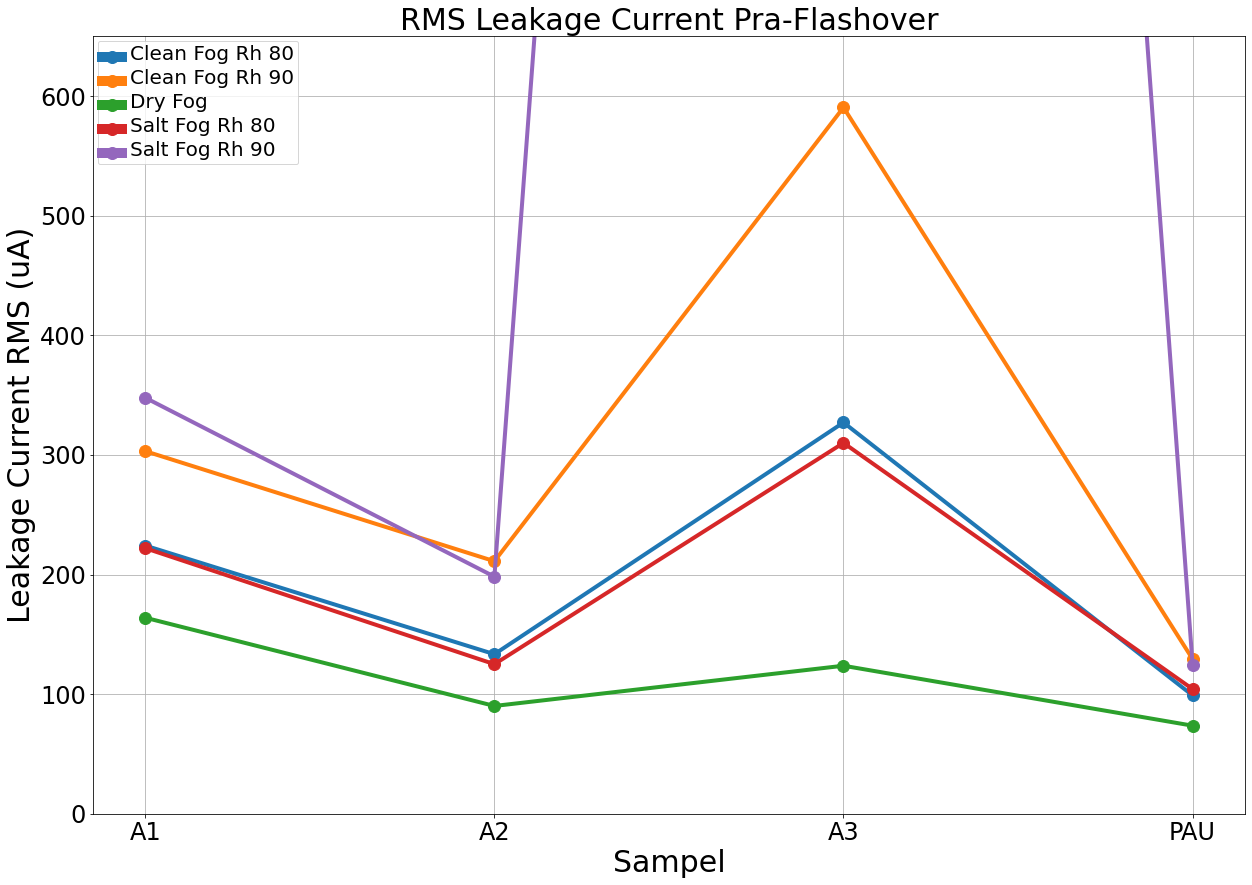

In [10]:
fig0 = plt.figure(figsize = (20,13.5))
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile0:
    axes0.plot(rmsData0['Sampel'],rmsData0['LC RMS '+nf+' (uA)'],label=nf,linewidth=4,marker='o',markersize=12)

axes0.legend()
axes0.set_title(gambarRMS0, fontsize = 30)
axes0.set_xlabel('Sampel', fontsize = 30)
axes0.set_ylabel('Leakage Current RMS (uA)', fontsize = 30)
# axes0.set_ylim([0,650]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(20)
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(24)
axes0.grid()

fig1 = plt.figure(figsize = (15,13.5))
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile1:
    axes1.plot(rmsData1['Level Tegangan'],rmsData1['LC RMS '+nf+' (uA)'],label=nf,linewidth=6,marker='o',markersize=12)

axes1.legend()
axes1.set_title(gambarRMS1, fontsize = 30)
axes1.set_xlabel('Level Tegangan', fontsize = 30)
axes1.set_ylabel('Leakage Current RMS (uA)', fontsize = 30)
axes1.set_ylim([0,230]) #Jangan Lupa Ganti
# #axes.set_xlim([0,0.04])
# #axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(15)
for label in (axes1.get_xticklabels() + axes1.get_yticklabels()):
    label.set_fontsize(24)
axes1.grid()

fig0.show()
fig1.show()


In [13]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarRMS0,quality=100,dpi=200)
fig1.savefig(fname='./'+outputFolder+'/'+gambarRMS1,quality=100,dpi=200)

<ipython-input-13-c3ef90ef3360>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarRMS0,quality=100,dpi=200)


## Plotting THD

<ipython-input-72-ea35df624b88>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


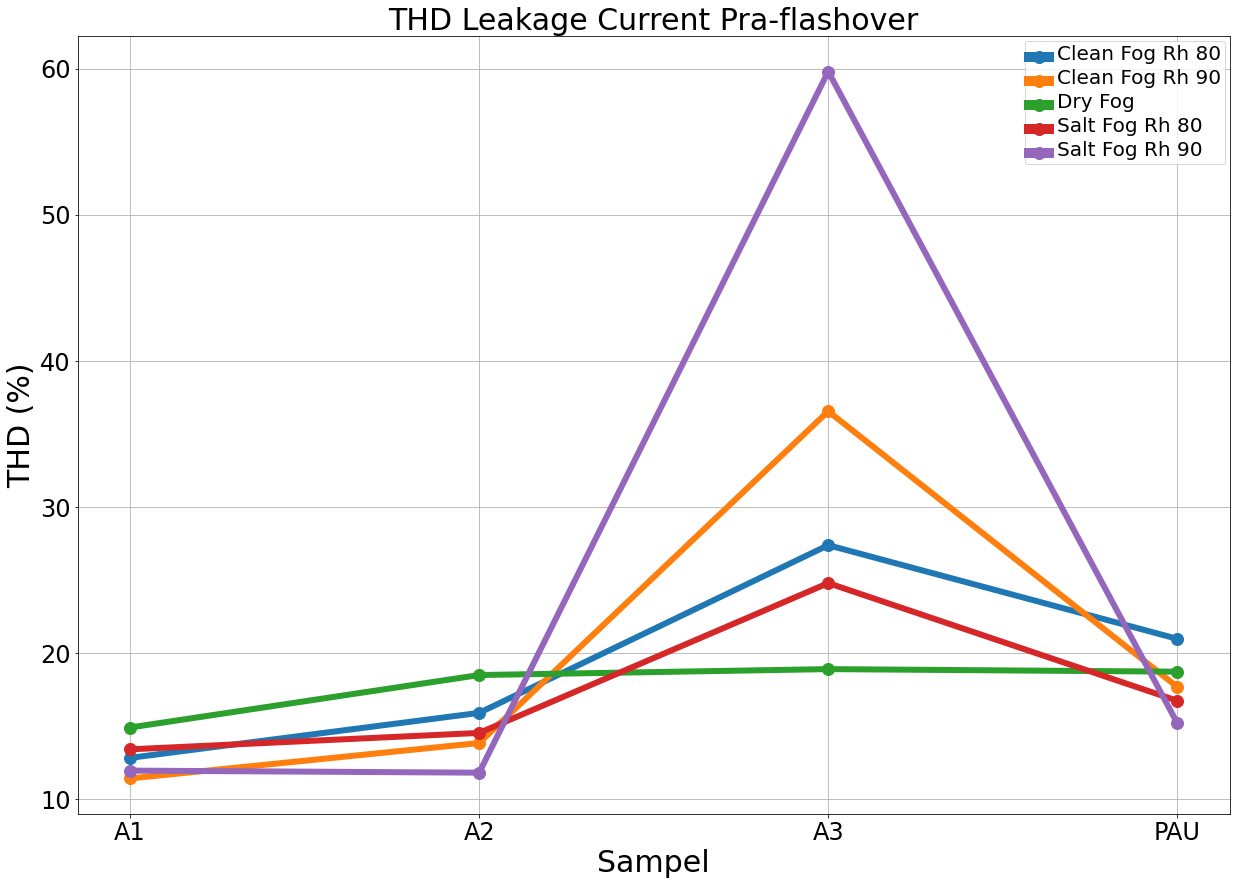

In [72]:
fig0 = plt.figure(figsize = (20,13.5))
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile0:
    axes0.plot(thdData0['Sampel'],thdData0['THD '+nf+' (%)'],label=nf,linewidth=6,marker='o',markersize=12)

axes0.legend()
axes0.set_title(gambarTHD0, fontsize = 30)
axes0.set_xlabel('Sampel', fontsize = 30)
axes0.set_ylabel('THD (%)', fontsize = 30)
# axes0.set_ylim([0,24]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(20)
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(24)
axes0.grid()
fig0.show()

fig1 = plt.figure(figsize = (15,13.5))
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile1:
    axes1.plot(thdData1['Level Tegangan'],thdData1['THD '+nf+' (%)'],label=nf,linewidth=6,marker='o',markersize=12)
    print(nf)
    
axes1.legend()
axes1.set_title(gambarTHD1, fontsize = 30)
axes1.set_xlabel('Level Tegangan', fontsize = 30)
axes1.set_ylabel('THD (%)', fontsize = 30)
axes1.set_ylim([0,24])    #Jangan Lupa Ganti
#axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(15)
for label in (axes1.get_xticklabels() + axes1.get_yticklabels()):
    label.set_fontsize(24)
axes1.grid()
fig1.show()


In [73]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarTHD0,quality=100,dpi=200)
fig1.savefig(fname='./'+outputFolder+'/'+gambarTHD1,quality=100,dpi=200)

<ipython-input-73-c8b72d95f28d>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarTHD0,quality=100,dpi=200)


## Plotting Cross Product

<ipython-input-74-842b4e997f57>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


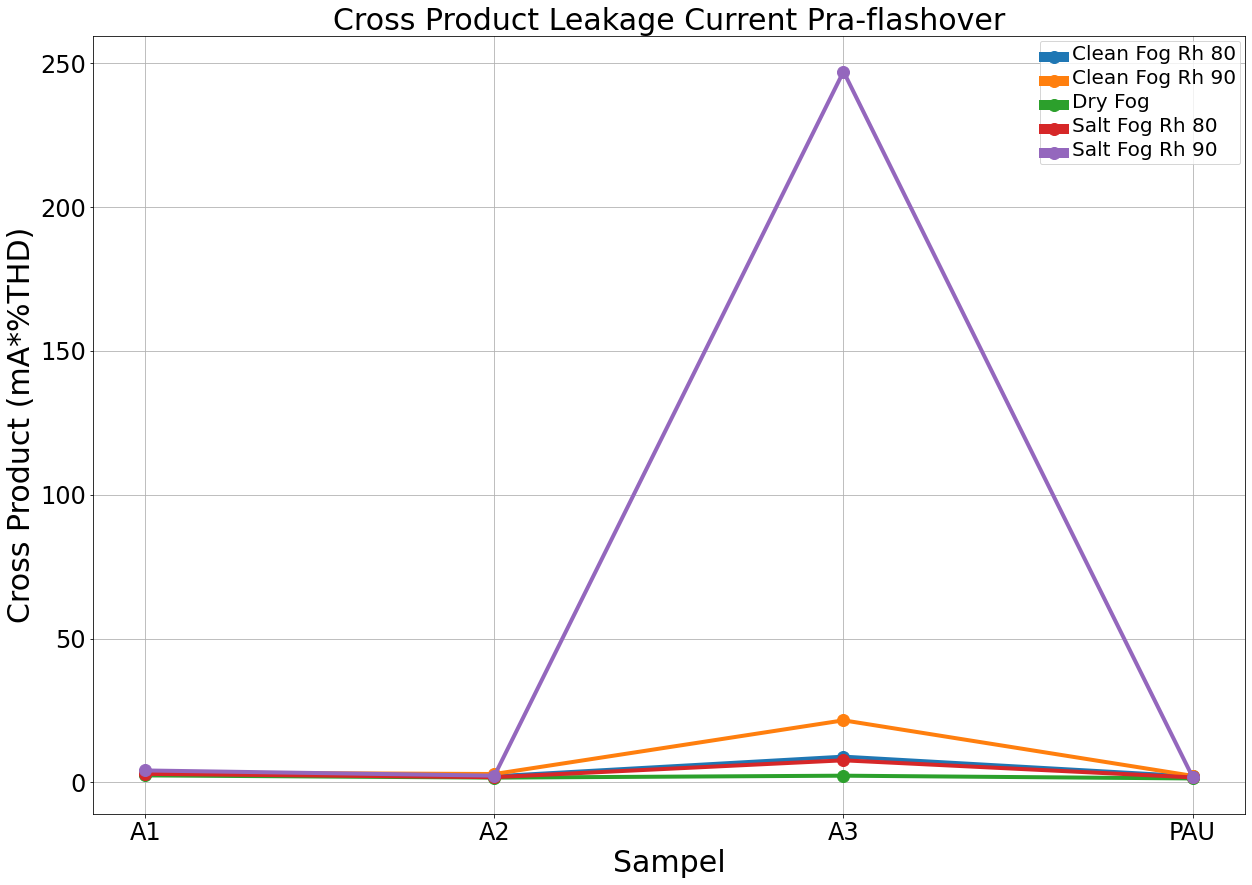

In [74]:
fig0 = plt.figure(figsize = (20,13.5))
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile0:
    axes0.plot(crossProduct0['Sampel'],crossProduct0['Cross Product '+nf+' (mA*%THD)'],label=nf,linewidth=4,marker='o',markersize=12)

axes0.legend()
axes0.set_title(gambarCross0, fontsize = 30)
axes0.set_xlabel('Sampel', fontsize = 30)
axes0.set_ylabel('Cross Product (mA*%THD)', fontsize = 30)
# axes0.set_ylim([0,3.9]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(20)
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(24)
axes0.grid()
fig0.show()

fig1 = plt.figure(figsize = (15,13.5))
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
i = 0
for nf in namaFile1:
    axes1.plot(crossProduct1['Level Tegangan'],crossProduct1['Cross Product '+nf+' (mA*%THD)'],label=nf,linewidth=6,marker='o',markersize=12)

axes1.legend()
axes1.set_title(gambarCross1, fontsize = 30)
axes1.set_xlabel('Level Tegangan', fontsize = 30)
axes1.set_ylabel('Cross Product (mA*%THD)', fontsize = 30)
# axes1.set_ylim([0,3.9]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(15)
for label in (axes1.get_xticklabels() + axes1.get_yticklabels()):
    label.set_fontsize(24)
axes1.grid()
fig1.show()


In [75]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarCross0,quality=100,dpi=200)
fig1.savefig(fname='./'+outputFolder+'/'+gambarCross1,quality=100,dpi=200)

<ipython-input-75-b943f7ae1918>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarCross0,quality=100,dpi=200)


In [65]:
crossProduct0.to_excel(excel_writer='./'+outputFolder+'/Cross Product flashover.xlsx',index=False)
rmsData0.to_excel(excel_writer='./'+outputFolder+'/LC RMS Gabungan flashover.xlsx',index=False)
thdData0.to_excel(excel_writer='./'+outputFolder+'/THD Gabungan Aging flashover.xlsx',index=False)
# crossProduct1.to_excel(excel_writer='./'+outputFolder+'/Cross Product Aging 1000 Jam Salt Fog Rh-90.xlsx',index=False)
# rmsData1.to_excel(excel_writer='./'+outputFolder+'/LC RMS Gabungan Aging 1000 Jam Salt Fog Rh-90.xlsx',index=False)
# thdData1.to_excel(excel_writer='./'+outputFolder+'/THD Gabungan Aging 1000 Jam Salt Fog Rh-90.xlsx',index=False)


In [134]:
crossProduct.to_excel(excel_writer='./'+outputFolder+'/Cross Product Gabungan Salt Fog Rh-90.xlsx',index=False)
rmsData.to_excel(excel_writer='./'+outputFolder+'/LC RMS Gabungan Salt Fog Rh-90.xlsx',index=False)
thdData.to_excel(excel_writer='./'+outputFolder+'/THD Gabungan Salt Fog Rh-90.xlsx',index=False)